In [1]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:

# Chemin vers l'image
chemin_image = "data/monalisa.jpg"

# Lire l'image en utilisant OpenCV
image = cv2.imread(chemin_image)


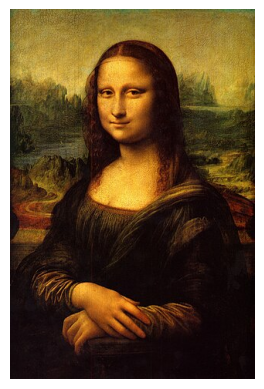

In [3]:
# Convertir l'image de BGR à RGB pour l'affichage avec Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Afficher l'image à l'aide de Matplotlib
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


In [4]:
# Afficher les attributs de l'image
print("Attributs de l'image :")
print("Dimensions :", image.shape)
print("Type de données :", image.dtype)

Attributs de l'image :
Dimensions : (480, 317, 3)
Type de données : uint8


# Echantillonnage d'une image
L'échantillonnage d'image est le processus de sélection d'un sous-ensemble de pixels à partir d'une image originale. Cela se fait en choisissant régulièrement des points à intervalles spécifiques dans l'image. L'objectif principal de l'échantillonnage est de réduire la résolution de l'image pour des besoins spécifiques tels que la réduction de la taille du fichier ou l'accélération du traitement.

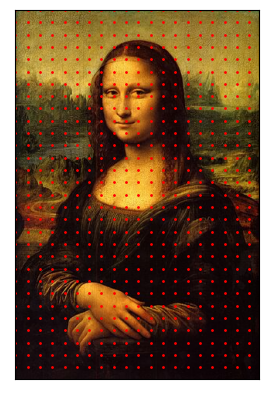

In [5]:
taille_image=image_rgb.shape
# Définir une résolution fixe
resolution = 16

# Calculer les coordonnées des points échantillonnés
indices_x = np.arange(0, taille_image[1], resolution)
indices_y = np.arange(0, taille_image[0], resolution)
points_x, points_y = np.meshgrid(indices_x, indices_y)

# Afficher l'image originale
plt.imshow(image_rgb, cmap='gray')

# Afficher les points échantillonnés en rouge
plt.scatter(points_x, points_y, color='red', s=1)

# Masquer les graduations des axes
plt.xticks([])
plt.yticks([])

# Afficher le graphe
plt.show()

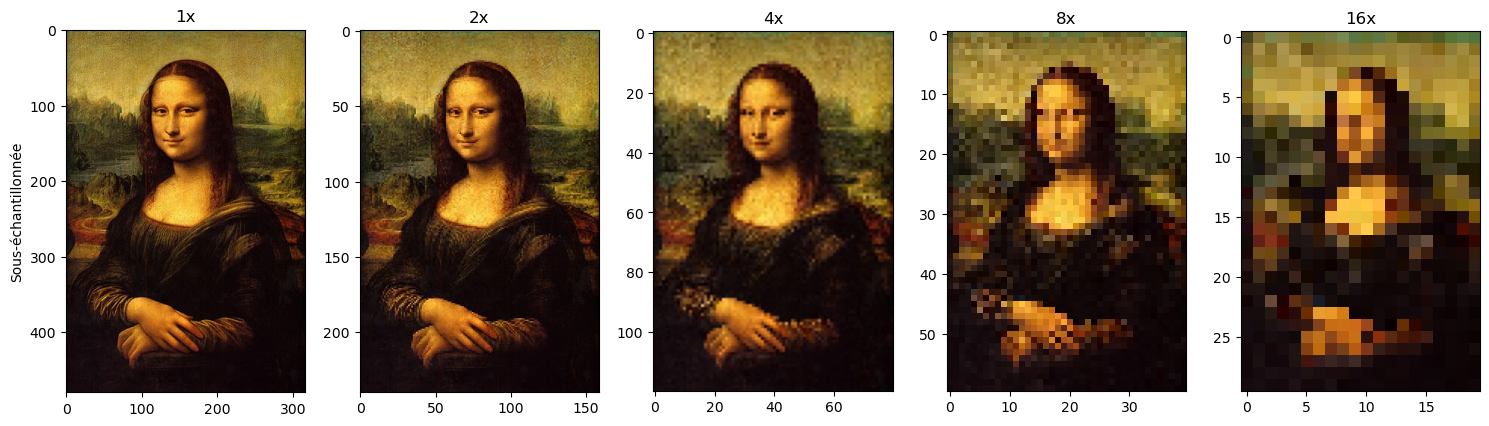

In [6]:


# Définir différentes résolutions d'échantillonnage
resolutions = [1, 2, 4, 8, 16]  # L'image sera échantillonnée à 1x, 2x, 4x, 8x et 16x

# Créer une grille de sous-graphiques pour afficher les images
num_lignes = 1  # Nombre de lignes dans la grille de sous-graphiques
num_cols = len(resolutions)  # Nombre de colonnes dans la grille de sous-graphiques
fig, axes = plt.subplots(num_lignes, num_cols, figsize=(15, 6))

# Itérer sur les différentes résolutions
for i, res in enumerate(resolutions):
    # Calculer l'image sous-échantillonnée en utilisant l'échantillonnage de l'image
    image_sous_echantillonnee = image_rgb[::res, ::res, :]

    # Afficher l'image sous-échantillonnée
    axes[i].imshow(image_sous_echantillonnee)
    axes[i].set_title(f'{res}x')



# Définir les titres des sous-graphiques
axes[0].set_ylabel('Sous-échantillonnée')

# Supprimer les sous-graphiques vides si nécessaire
if len(resolutions) < num_cols:
    for j in range(len(resolutions), num_cols):
        fig.delaxes(axes[j])

# Ajuster l'espacement et afficher le graphe
plt.tight_layout()
plt.show()


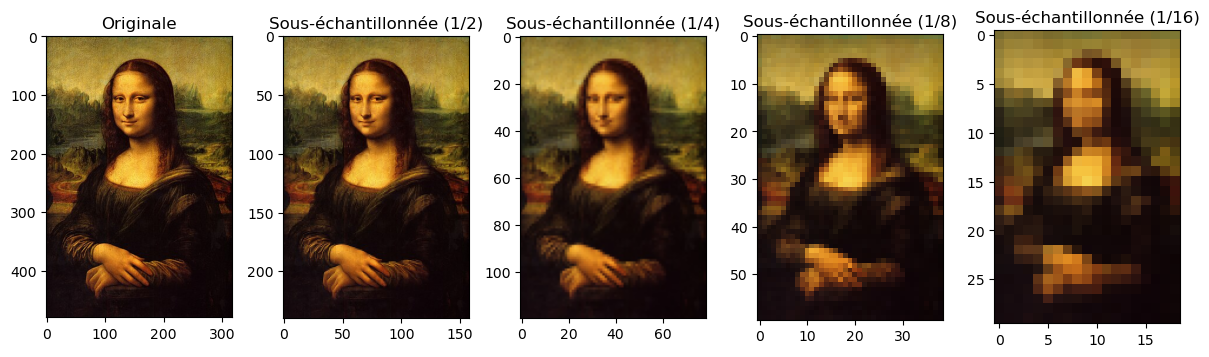

In [7]:
from PIL import Image

def sous_echantillonnage(image, facteur_echelle):
    largeur, hauteur = image.shape[1], image.shape[0]
    nouvelle_largeur, nouvelle_hauteur = int(largeur / facteur_echelle), int(hauteur / facteur_echelle)
    nouvelle_image = np.zeros((nouvelle_hauteur, nouvelle_largeur, image.shape[2]), dtype=np.uint8)

    for y in range(nouvelle_hauteur):
        for x in range(nouvelle_largeur):
            nouvelle_image[y, x] = np.mean(image[y*facteur_echelle:(y+1)*facteur_echelle,
                                                 x*facteur_echelle:(x+1)*facteur_echelle], axis=(0, 1))

    return nouvelle_image

# Définir les facteurs d'échelle souhaités
facteurs_echelle = [2, 4, 8,16]

# Effectuer le sous-échantillonnage et afficher les résultats
fig, axes = plt.subplots(1, len(facteurs_echelle) + 1, figsize=(12, 4))

# Image d'origine
axes[0].imshow(image_rgb)
axes[0].set_title('Originale')

# Images sous-échantillonnées
for i, facteur in enumerate(facteurs_echelle):
    image_sous_echantillonnee = sous_echantillonnage(image_rgb, facteur)
    axes[i+1].imshow(image_sous_echantillonnee)
    axes[i+1].set_title(f'Sous-échantillonnée (1/{facteur})')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()


# Quantification du niveaux de gris


La quantification des niveaux de gris est un processus qui consiste à réduire le nombre de niveaux de gris dans une image en attribuant une valeur discrète à chaque pixel. Cela signifie que les valeurs d'intensité des niveaux de gris sont regroupées en un nombre limité de niveaux prédéfinis.



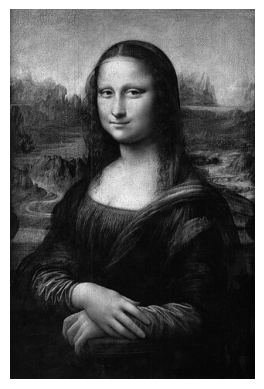

In [8]:
#Transformer l'image couleur en nuance de gris
image_gray=cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
# Afficher l'image à l'aide de Matplotlib
plt.imshow(image_gray,cmap='gray')
plt.axis("off")
plt.show()


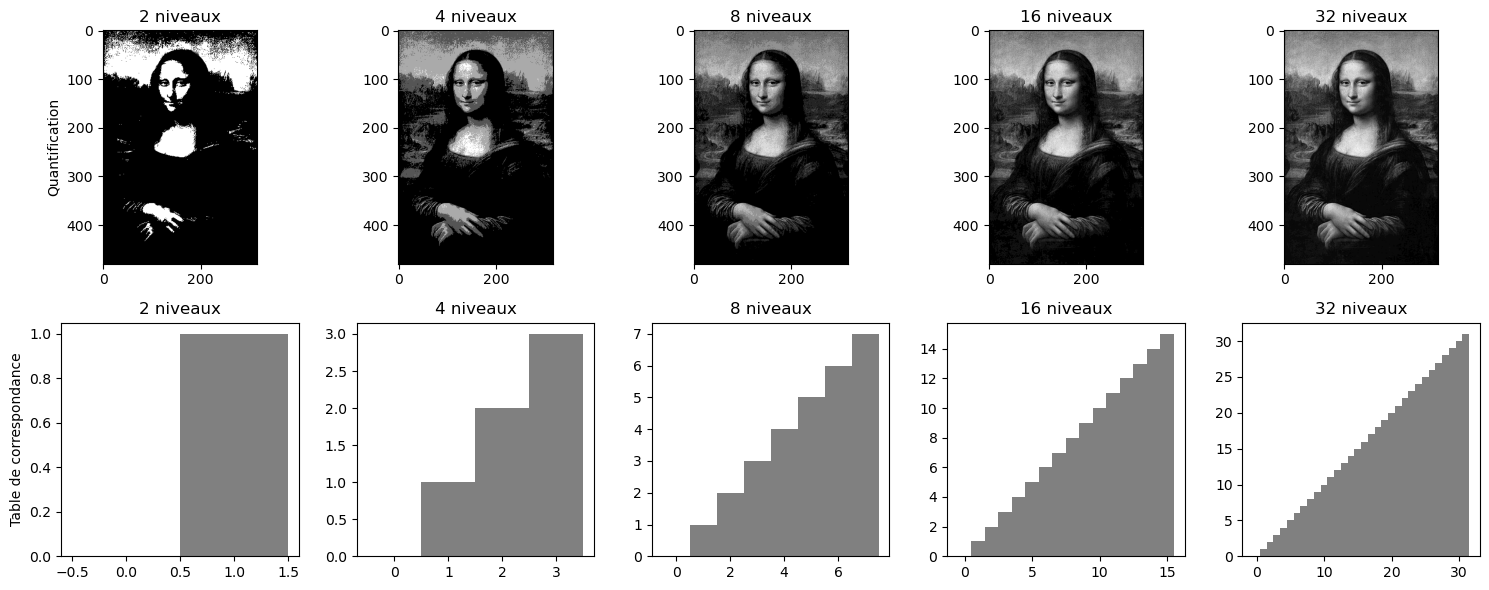

In [9]:

# Définir différents niveaux de quantification
niveaux_quantification = [2, 4, 8, 16, 32]  # Nombre de niveaux de gris utilisés pour quantifier l'intensité

# Créer une grille de sous-graphiques pour afficher les images
num_lignes = 2  # Nombre de lignes dans la grille de sous-graphiques
num_cols = len(niveaux_quantification)  # Nombre de colonnes dans la grille de sous-graphiques
fig, axes = plt.subplots(num_lignes, num_cols, figsize=(15, 6))

# Itérer sur les différents niveaux de quantification
for i, niveaux in enumerate(niveaux_quantification):
    # Quantifier les niveaux de gris
    image_quantifiee = (image_gray // (256 // niveaux)) * (256 // niveaux)

    # Afficher l'image quantifiée
    axes[0, i].imshow(image_quantifiee, cmap="gray")
    axes[0, i].set_title(f"{niveaux} niveaux")

    # Afficher la table de correspondance des niveaux de gris
    axes[1, i].bar(range(niveaux), range(niveaux), color=f"gray", align="center", width=1)
    axes[1, i].set_title(f"{niveaux} niveaux")

# Définir les titres des sous-graphiques
axes[0, 0].set_ylabel("Quantification")
axes[1, 0].set_ylabel("Table de correspondance")

# Supprimer les sous-graphiques vides si nécessaire
if len(niveaux_quantification) < num_cols:
    for j in range(len(niveaux_quantification), num_cols):
        fig.delaxes(axes[0, j])
        fig.delaxes(axes[1, j])

# Ajuster l'espacement et afficher le graphe
plt.tight_layout()
plt.show()
